In [1]:
import sys
import os
# Get the current working directory (the directory where the notebook is located)
current_dir = os.getcwd()
# Get the path of the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)
# Change the working directory to the parent directory
os.chdir(parent_dir)

In [2]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import re
import cv2
from tools.read_jsons import * # read_jsons.py
from tools.get_image_files import * # get_image_files.py
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
webcoos_token = os.getenv('WebCOOS')
# print('WebCOOS token:', webcoos_token)

We need data frome the shoreline JSONs to test the standard `create_video()` method for time-lapse overlay of the detected shorelines with their respective images.

The shorelines detected for `oakisland_west` are obtained with similar method that is scaled and in operation at:
- axiom URL

In [4]:
station_name = 'oakisland_west'
# Instantiate the ShorelineDataProcessor class
processor = ShorelineDataProcessor(station_name)
# Get the shoreline coordinates DataFrame
shoreline_coords_df = processor.get_shoreline_coords()
sld17 = shoreline_coords_df.loc['2023-12-17':'2023-12-17'].copy()
sld17.dropna(axis=1,inplace=True)

c:\Users\Corey Dearing\Desktop\ShorelineProjectRepo\transect_jsons\oakisland_west
Shape of exploded_df: (5928, 12)
Info:                Time Info      X      Y
0    2024-07-01 00:00:58  277.0  163.0
0    2024-07-01 00:00:58  249.0  166.0
0    2024-07-01 00:00:58  246.0  169.0
0    2024-07-01 00:00:58  246.0  172.0
0    2024-07-01 00:00:58  249.0  175.0
..                   ...    ...    ...
246  2024-07-22 00:00:21  297.0  220.0
246  2024-07-22 00:00:21  290.0  223.0
246  2024-07-22 00:00:21  277.0  226.0
246  2024-07-22 00:00:21  267.0  229.0
246  2024-07-22 00:00:21  279.0  232.0

[5928 rows x 3 columns]
Shape of coords_df: (247, 24)


# Get & Process Shoreline Images

In [31]:
# station_name = 'oakisland_west'
station_name = 'jennette_north'
# station_name = 'currituck_hampton_inn'
getImg = GetImages(station_name)

In [32]:
getImg.get_image_dir()

'images/jennette_north/'

In [33]:
getImg.set_image_type('timex')

'images/jennette_north/timex/'

In [34]:
getImg.get_image_list()[:5]

['jennette_north-2024-07-01-094807Z-timex.jpeg',
 'jennette_north-2024-07-01-102350Z-timex.jpeg',
 'jennette_north-2024-07-01-112349Z-timex.jpeg',
 'jennette_north-2024-07-01-122349Z-timex.jpeg',
 'jennette_north-2024-07-01-131859Z-timex.jpeg']

In [35]:
getImg.parse_image_datetime()[:5]

['2024-07-01 09:48:07',
 '2024-07-01 10:23:50',
 '2024-07-01 11:23:49',
 '2024-07-01 12:23:49',
 '2024-07-01 13:18:59']

In [36]:
getImg.create_image_df().tail()

,Image
Datetime,
2024-07-31 22:57:46,jennette_north-2024-07-31-225746Z-timex.jpeg
2024-07-31 23:05:04,jennette_north-2024-07-31-230504Z-timex.jpeg
2024-07-31 23:15:30,jennette_north-2024-07-31-231530Z-timex.jpeg
2024-07-31 23:22:17,jennette_north-2024-07-31-232217Z-timex.jpeg
2024-07-31 23:31:40,jennette_north-2024-07-31-233140Z-timex.jpeg


In [37]:
getImg.image_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 2024-07-01 09:48:07 to 2024-07-31 23:31:40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   708 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [38]:
# dt_range = getImg.get_date_range('2023-12-17 00:00:00', '2023-12-18 00:00:00')
dt_range = getImg.get_date_range('2024-07-14 00:00:00', '2024-08-01 00:00:00')
dt_range[:5]

Index(['2024-07-14 10:05:21', '2024-07-14 11:05:22', '2024-07-14 11:59:50',
       '2024-07-14 12:58:14', '2024-07-14 13:34:05'],
      dtype='object', name='Datetime')

In [39]:
getImg.get_image_range(dt_range).tail()

,Image
Datetime,
2024-07-31 22:57:46,jennette_north-2024-07-31-225746Z-timex.jpeg
2024-07-31 23:05:04,jennette_north-2024-07-31-230504Z-timex.jpeg
2024-07-31 23:15:30,jennette_north-2024-07-31-231530Z-timex.jpeg
2024-07-31 23:22:17,jennette_north-2024-07-31-232217Z-timex.jpeg
2024-07-31 23:31:40,jennette_north-2024-07-31-233140Z-timex.jpeg


In [40]:
imgs = getImg.get_images()

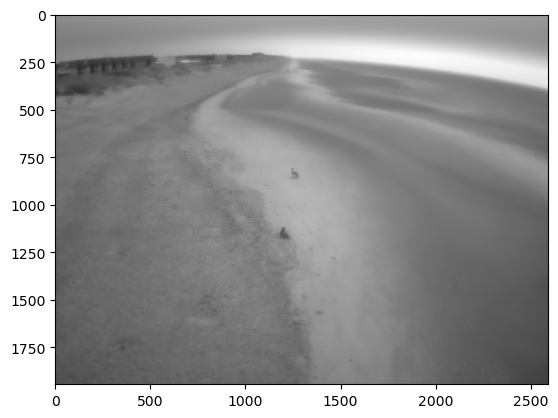

In [41]:
first_image_bgr = imgs[dt_range[0]]

# Convert BGR to RGB for correct display
first_image_rgb = cv2.cvtColor(first_image_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(first_image_rgb)
plt.show()

In [42]:
# get the first image in the dictionary
imgs[list(imgs.keys())[0]].shape

(1944, 2592, 3)

In [43]:
for key, value in imgs.items():
    print(key, value.shape)
    

2024-07-14 10:05:21 (1944, 2592, 3)
2024-07-14 11:05:22 (1944, 2592, 3)
2024-07-14 11:59:50 (1944, 2592, 3)
2024-07-14 12:58:14 (1944, 2592, 3)
2024-07-14 13:34:05 (1944, 2592, 3)
2024-07-14 14:34:04 (1944, 2592, 3)
2024-07-14 15:34:11 (1944, 2592, 3)
2024-07-14 16:24:28 (1944, 2592, 3)
2024-07-14 17:04:42 (1944, 2592, 3)
2024-07-14 17:39:01 (1944, 2592, 3)
2024-07-14 18:30:58 (1944, 2592, 3)
2024-07-14 19:25:41 (1944, 2592, 3)
2024-07-14 20:25:41 (1944, 2592, 3)
2024-07-14 21:09:05 (1944, 2592, 3)
2024-07-14 22:04:55 (1944, 2592, 3)
2024-07-14 22:48:18 (1944, 2592, 3)
2024-07-14 23:34:16 (1944, 2592, 3)
2024-07-15 00:19:09 (1944, 2592, 3)
2024-07-15 10:13:43 (1944, 2592, 3)
2024-07-15 11:11:07 (1944, 2592, 3)
2024-07-15 12:11:06 (1944, 2592, 3)
2024-07-15 13:08:22 (1944, 2592, 3)
2024-07-15 13:44:21 (1944, 2592, 3)
2024-07-15 14:14:05 (1944, 2592, 3)
2024-07-15 14:59:49 (1944, 2592, 3)
2024-07-15 15:28:00 (1944, 2592, 3)
2024-07-15 15:52:12 (1944, 2592, 3)
2024-07-15 17:35:59 (1944, 2

In [44]:
getImg.resize_images(scale_percent=30)
for key, value in getImg.scaled_images.items():
    print(key, value.shape)

2024-07-14 10:05:21 (583, 777, 3)
2024-07-14 11:05:22 (583, 777, 3)
2024-07-14 11:59:50 (583, 777, 3)
2024-07-14 12:58:14 (583, 777, 3)
2024-07-14 13:34:05 (583, 777, 3)
2024-07-14 14:34:04 (583, 777, 3)
2024-07-14 15:34:11 (583, 777, 3)
2024-07-14 16:24:28 (583, 777, 3)
2024-07-14 17:04:42 (583, 777, 3)
2024-07-14 17:39:01 (583, 777, 3)
2024-07-14 18:30:58 (583, 777, 3)
2024-07-14 19:25:41 (583, 777, 3)
2024-07-14 20:25:41 (583, 777, 3)
2024-07-14 21:09:05 (583, 777, 3)
2024-07-14 22:04:55 (583, 777, 3)
2024-07-14 22:48:18 (583, 777, 3)
2024-07-14 23:34:16 (583, 777, 3)
2024-07-15 00:19:09 (583, 777, 3)
2024-07-15 10:13:43 (583, 777, 3)
2024-07-15 11:11:07 (583, 777, 3)
2024-07-15 12:11:06 (583, 777, 3)
2024-07-15 13:08:22 (583, 777, 3)
2024-07-15 13:44:21 (583, 777, 3)
2024-07-15 14:14:05 (583, 777, 3)
2024-07-15 14:59:49 (583, 777, 3)
2024-07-15 15:28:00 (583, 777, 3)
2024-07-15 15:52:12 (583, 777, 3)
2024-07-15 17:35:59 (583, 777, 3)
2024-07-15 18:43:01 (583, 777, 3)
2024-07-15 18:

In [45]:
getImg.norm_rmb_images(scale=False)

In [46]:
getImg.otsu_threshold()

otsu_norm type: <class 'dict'>


In [47]:
getImg.image_gradient()

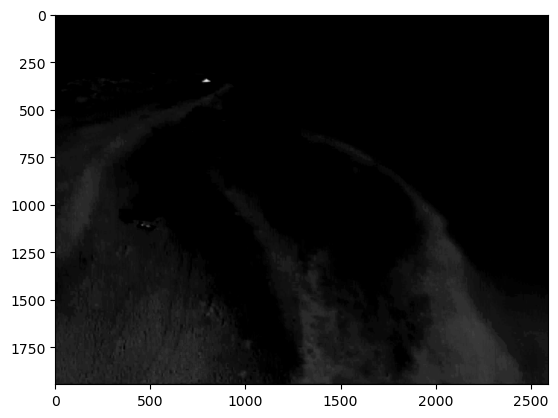

In [48]:
# plot the otsu threshold image
plt.imshow(getImg.norm_rmb[dt_range[4]], cmap='gray')

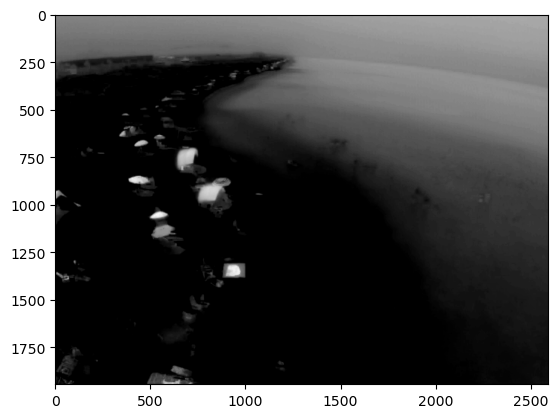

In [49]:
# show normalized bmr image
plt.imshow(getImg.norm_bmr[dt_range[10]], cmap='gray')

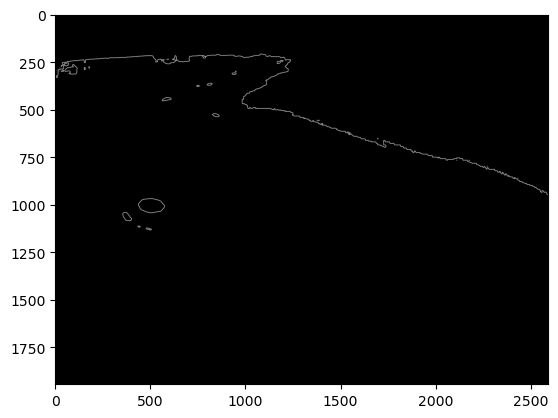

In [50]:
# plot first gradient image
plt.imshow(getImg.image_gradients[list(getImg.image_gradients.keys())[4]], cmap='gray')

In [51]:
getImg.gradient_mask(scale=False)

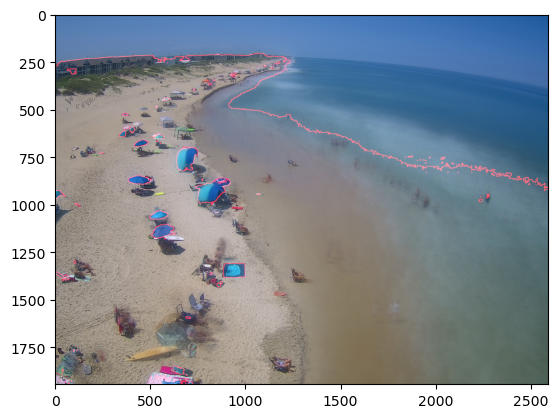

In [52]:

first_masked_image = getImg.gradient_masks[dt_range[10]]
# Convert BGR to RGB for correct display
first_masked_rgb = cv2.cvtColor(first_masked_image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(first_masked_rgb)
plt.show()

In [25]:
# getImg.gradient_video(output_video='gradient_video_jennette.mp4', fps=10)

In [26]:
# getImg.gradient_timelapse(output_video='gradient_bmr_timelapse_currituck.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_rmb_timelapse_currituck.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_bmr_timelapse_jennette.mp4', fps=10)
# getImg.gradient_timelapse(output_video='gradient_rmb_timelapse_oakisland_west.mp4', fps=10)

In [27]:
# getImg.create_video(sld17, output_video='timex_video_scaled30.mp4', fps=10, scale_percent=30)
 # technically we can reverse the scaling on the original transection data which was implemented for operation/production purposes
 # Instead of scaling the image down, we scale all the transection data up to match the original image size
 # this means scaling both the column headers and row values
# getImg.create_video(sld17, output_video='timex_video_scaled30.mp4', fps=10, scale_percent=30)

How does the average RBG intensity for each image effect the RminusB vs. BminusR methods.

# Post Processed Detected Shoreline Time-lapse Videos
The following video link will take you to a youtube time-lapse.


## Jennette Time-lapse

[![Watch the video](https://img.youtube.com/vi/OH0Zoz2ayac/maxresdefault.jpg
)](https://youtu.be/OH0Zoz2ayac)


## Oak Island West Time-lapse
[![Watch the video](https://img.youtube.com/vi/lFR8cGO38n4/maxresdefault.jpg
)](https://youtu.be/lFR8cGO38n4)



# Currituck Hampton Inn Time-lapse
[![Watch the video](https://img.youtube.com/vi/qCO_ftlARIo/maxresdefault.jpg
)](https://youtu.be/qCO_ftlARIo)
